In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
house = pd.read_csv(r'C:/Users/Hitesh/Desktop/College/TE/DSBDA/Practicals/Assignment-5/Banglore-Housing-Prices.csv')

In [4]:
house

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [5]:
house.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
house['size'] = house['size'].str.replace("\D","",regex = True)

In [11]:
house['size'] = house['size'].replace(np.NaN,house['size'].mode()[0])

In [12]:
house.isnull().sum()

location       1
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
house['bath'] = house['bath'].replace(np.NaN, house['bath'].mode()[0])

In [14]:
house.isnull().sum()

location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
house = house.dropna()

In [18]:
house.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [25]:
house['total_sqft'] = house['total_sqft'].str.replace('\D',"",regex=True)

<ipython-input-25-3847c8857539>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['total_sqft'] = house['total_sqft'].str.replace('\D',"",regex=True)


In [26]:
sqft = []
split_str = []

for i in house['total_sqft']:
    if '-' in i:
        split_str = i.split()
        average = (float(split_str[0]) + float(split_str[2]))/2
        sqft.append(float(average))
    else:
        sqft.append(float(i))

In [29]:
house['total_sqft'] = sqft

<ipython-input-29-460700dfd254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['total_sqft'] = sqft


In [30]:
price_per_sqft = []

for i,j in zip(house['price'],house['total_sqft']):
    price_per_sqft.append(i/j)

In [31]:
house['price_per_sqft'] = price_per_sqft

<ipython-input-31-11ba8fba07ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_per_sqft'] = price_per_sqft


In [32]:
house.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
price_per_sqft    float64
dtype: object

In [33]:
house['size'] = house['size'].apply(pd.to_numeric)

<ipython-input-33-289b131e9eba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['size'] = house['size'].apply(pd.to_numeric)


In [34]:
house.dtypes

location           object
size                int64
total_sqft        float64
bath              float64
price             float64
price_per_sqft    float64
dtype: object

C:\Users\Hitesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size'>

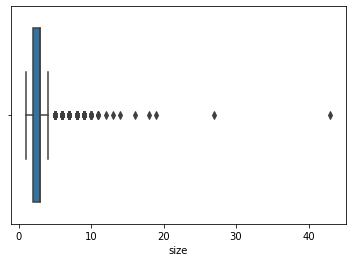

In [35]:
sns.boxplot(house['size'])

C:\Users\Hitesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

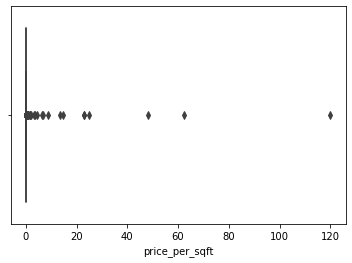

In [36]:
sns.boxplot(house['price_per_sqft'])

In [42]:
(house.describe())

,size,total_sqft,bath,price,price_per_sqft
count,13319.000000,1.331900e+04,13319.000000,13319.000000,1.331900e+04
mean,2.802763,5.886026e+07,2.688790,112.567621,9.356274e-02
std,1.294543,3.486988e+09,1.338801,148.977089,1.310280e+00
min,1.000000,1.000000e+00,1.000000,8.000000,4.716769e-10
25%,2.000000,1.100000e+03,2.000000,50.000000,4.190368e-02
50%,3.000000,1.286000e+03,2.000000,72.000000,5.381166e-02
75%,3.000000,1.703000e+03,3.000000,120.000000,7.272727e-02
max,43.000000,2.249814e+11,40.000000,3600.000000,1.200000e+02


In [43]:
house = house[(house['size']>=2) & (house['size']<=3) & (house['price_per_sqft']>=0.042393) & (house['price_per_sqft']<=0.073171)]

C:\Users\Hitesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size'>

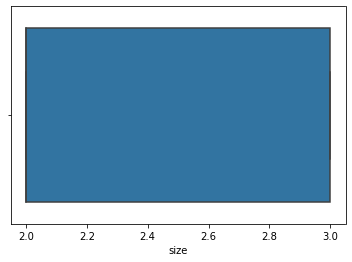

In [44]:
sns.boxplot(house['size'])

C:\Users\Hitesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

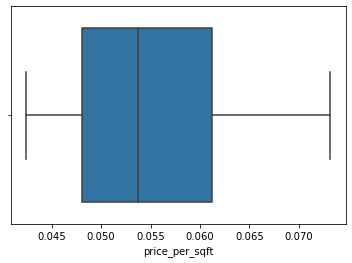

In [45]:
sns.boxplot(house['price_per_sqft'])

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [51]:
linear = LinearRegression()
scaler = StandardScaler()
encoder = LabelEncoder()

In [52]:
house['location'] = encoder.fit_transform(house['location'])

<ipython-input-52-5b0a9a587c2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['location'] = encoder.fit_transform(house['location'])


In [53]:
house['location']

2        684
3        441
4        418
8        468
14       599
        ... 
13302     58
13309    735
13310    558
13314    268
13317    562
Name: location, Length: 5730, dtype: int32

In [54]:
house_x = house.iloc[:,0:4]
house_y = house.iloc[:,5]

In [57]:
x_train,x_test,y_train,y_test = train_test_split(house_x,house_y, test_size=0.25,random_state=4)

In [58]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [59]:
linear.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred = linear.predict(x_test)

In [61]:
y_pred

array([0.05599138, 0.05370006, 0.05379656, ..., 0.0555206 , 0.05659556,
       0.05396829])

In [68]:
mse = mean_squared_error(y_test,y_pred)

In [69]:
mse

6.48440006775008e-05

In [66]:
r2 = r2_score(y_test,y_pred)

In [67]:
r2

0.04691896285735042

In [71]:
mae = mean_absolute_error(y_test,y_pred)

In [72]:
mae

0.0068012964938566145